In [18]:
#載入需要的Library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

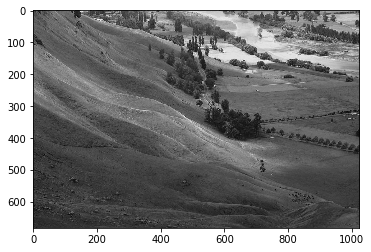

In [19]:
#讀圖片
img = cv2.imread('C:/Users/user/Desktop/7.jpg',cv2.IMREAD_GRAYSCALE)#以灰階方式讀圖片(灰階圖)
w,h = img.shape#圖片的寬w(y方向)和長h(x方向)
#秀圖
plt.imshow(img,cmap="gray")
plt.show()

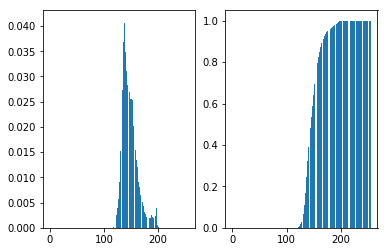

In [20]:
#灰階圖(百分比) & 灰階累計圖(百分比)
def graypicture(img,w,h):#輸入圖片(二維)和寬和長
    img = img.reshape(w*h)#將圖片轉成一維
    graylevel = np.zeros((256))#產生一個256的0矩陣(一維)[0-255]
    graypic = np.zeros((256))#產生一個256的0矩陣(一維)[0-255]
    acgraypic = np.zeros((256))#產生一個256的0矩陣(一維)[0-255]
    
    #用for 迴圈對圖片中每個pexil的灰階值對應到graylevel中的位置，統計出每個灰階值得數量
    for i in range(0,w*h,1):graylevel[img[i].astype(np.int)] = graylevel[img[i].astype(np.int)] + 1
    #將灰階的數量統計轉成百分比(機率)
    for i in range(0,256,1):graypic[i] = graylevel[i] / (w*h)
    #設定第一個值，後面進行累加
    acgraypic[0] = graypic[0]
    for i in range(1,256,1):acgraypic[i]= acgraypic[i-1]+graypic[i]
    
    #產生兩個圖
    fig, (pic1, pic2) = plt.subplots(1, 2)
    pic1.bar(range(0,256),graypic)#第一個灰階圖
    pic2.bar(range(0,256),acgraypic)#第一個累計圖
#執行結果
graypicture(img,w,h)

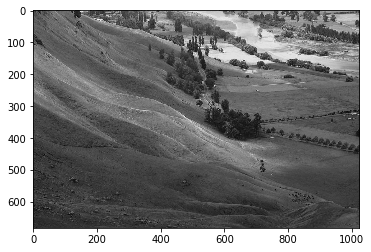

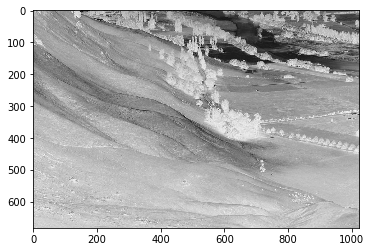

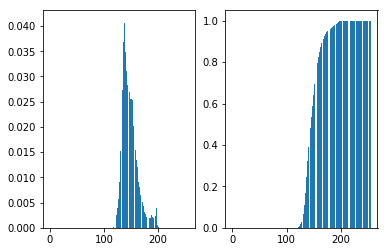

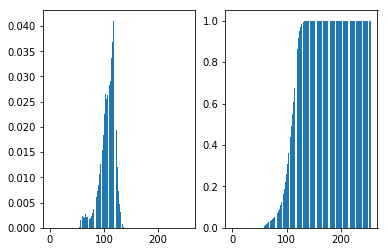

In [21]:
#Negative負片轉換
def Negative(pic,w,h):
    pic = pic.reshape(w*h)#將圖片轉成一維
    pic2 = np.zeros((w*h))#產生新的圖片(一維)
    #將每個pexil的值進行處理
    for i in range(0,w*h,1):
        pic2[i] = 256 - pic[i] - 1#轉換方程式
    pic2 = pic2.reshape(w,h)#將一維的圖片轉成二維
    return pic2#返回圖片的值
#執行結果
img2 = Negative(img,w,h)
plt.imshow(img,cmap="gray")
plt.show()
plt.imshow(img2,cmap="gray")
plt.show()
#兩組圖片的直方圖
graypicture(img,w,h)
graypicture(img2,w,h)

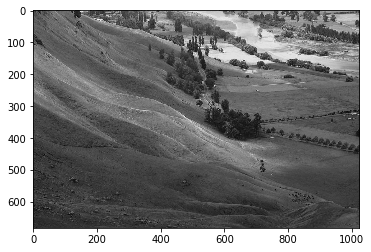

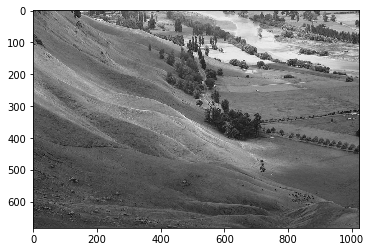

In [22]:
#log
def logtransfore(pic,w,h):
    pic = pic.reshape(w*h)#將圖片轉成一維
    pic2 = np.zeros((w*h))#產生新的圖片(一維)
    #將每個pexil的值進行處理
    for i in range(0,w*h,1):
        pic2[i] = math.log(pic[i]+1,10)#轉換方程式
    #進行規一化後乘上255
    pic2 = pic2 /pic2.max()*255
    pic2 = pic2.reshape(w,h)#將一維的圖片轉成二維
    return pic2#返回圖片的值

#執行結果
img3 = logtransfore(img,w,h)
plt.imshow(img,cmap="gray")
plt.show()
plt.imshow(img3,cmap="gray")
plt.show()

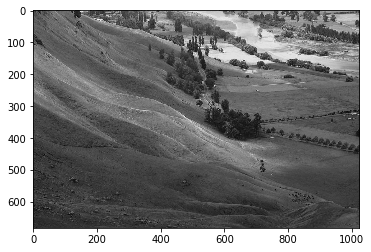

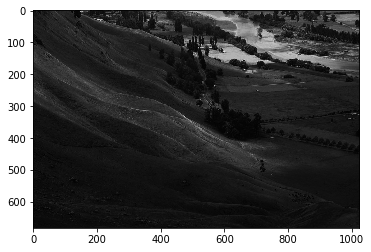

In [23]:
#inverse log
def inverselogtransfore(pic,w,h):
    a =1.03 # 1.03數值自訂義
    pic = pic.reshape(w*h)#將圖片轉成一維
    pic2 = np.zeros((w*h))#產生新的圖片(一維)
    #將每個pexil的值進行處理
    for i in range(0,w*h,1):
        pic2[i] = a**(pic[i])#轉換方程式
    #進行規一化後乘上255
    pic2 = pic2 /pic2.max()*255
    pic2 = pic2.reshape(w,h)#將一維的圖片轉成二維
    return pic2#返回圖片的值

#執行結果
img4 = inverselogtransfore(img,w,h)
plt.imshow(img,cmap="gray")
plt.show()
plt.imshow(img4,cmap="gray")
plt.show()